In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Branin
### Uniform

In [60]:
path = "/Users/caiting/Downloads/SE_kernel_2/SE/"
B_list = [10, 100]
T = 300

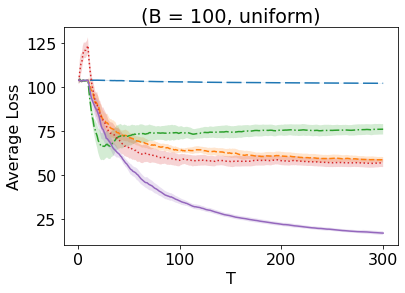

In [69]:
B = 100
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/branin_uniform_loss_B_%d_T_%d_non_active.npy"%(B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"branin_uniform_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/branin_uniform_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
C_list_1 = [10]
for C in C_list_1:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/new/branin_uniform_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ':', label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
C_list_2 = [1]
# C_list_2 = [0.5, 1, 1.5, 2]
for C in C_list_2:
    our_loss = np.load(path + "branin_uniform_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2 (ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best", fontsize = 12)
plt.xlabel("T")
plt.ylabel("Average Loss")
# plt.ylim(0,40)
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/Branin_uniform_loss_B_%d.pdf"%B, bbox_inches='tight')
# plt.savefig("./figures/new_v3/abaltion_Branin_uniform_loss_B_%d.pdf"%B, bbox_inches='tight')

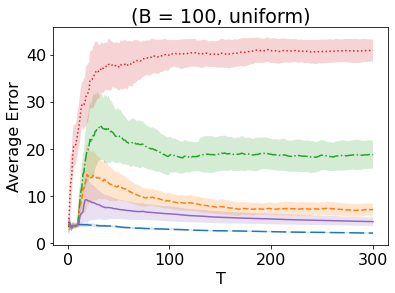

In [70]:
# non active
non_loss = np.load("./non_active/branin_uniform_error_B_%d_T_%d_non_active.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"branin_uniform_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/branin_uniform_error_B_%d_T_%d_drift.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/new/branin_uniform_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ':', label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# C_list_2 = [1, 1.5, 2]
for C in C_list_2:
    our_loss = np.load(path + "branin_uniform_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, '-', label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(fontsize = 14)
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/Branin_uniform_error_B_%d.pdf"%B, bbox_inches='tight')

### imbalanced

In [48]:
path = "/Users/caiting/Downloads/SE_kernel_2/SE/"
B_list = [1, 10, 100, 1000]
T = 300

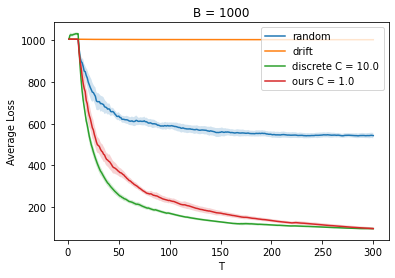

In [56]:
B = 1000
x = range(1, T+1)

# random
random_loss = np.load(path+"branin_imbalanced_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"branin_imbalanced_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1[2:3]:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/branin_imbalanced_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, label = "discrete C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
C_list_2 = [1, 1.5, 2]
for C in C_list_2[0:1]:
    our_loss = np.load(path + "branin_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, label = "ours C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Loss")
plt.title("B = %d"%B)
plt.savefig("./figures/gp/Branin_imbalanced_loss_B_%d.pdf"%B)

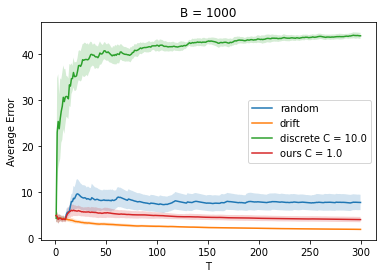

In [57]:
random_loss = np.load(path+"branin_imbalanced_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"branin_imbalanced_error_B_%d_T_%d_drift.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1[2:3]:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/branin_imbalanced_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, label = "discrete C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

C_list_2 = [1, 1.5, 2]
for C in C_list_2[0:1]:
    our_loss = np.load(path + "branin_imbalanced_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, label = "ours C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend()
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("B = %d"%B)
plt.savefig("./figures/gp/Branin_imbalanced_error_B_%d.pdf"%B)

# Hartmann
### Uniform

In [71]:
path = "/Users/caiting/Downloads/SE_kernel_2/SE/"
B_list = [10, 100]
T = 300

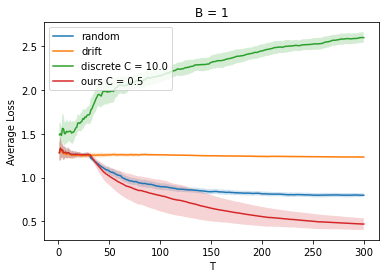

In [92]:
B = 1
x = range(1, T+1)

# random
random_loss = np.load(path+"hartmann_uniform_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"hartmann_uniform_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1[2:3]:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/hartmann_uniform_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, label = "discrete C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
C_list_2 = [0.25, 0.5, 1, 1.5]
for C in C_list_2[1:2]:
    our_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/hartmann_uniform_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, label = "ours C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Loss")
plt.title("B = %d"%B)
plt.savefig("./figures/gp/Hartmann_uniform_loss_B_%d.pdf"%B)

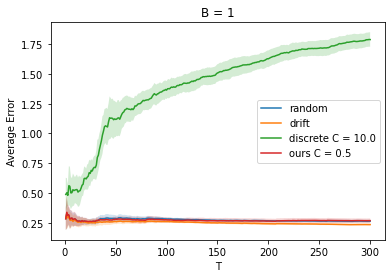

In [93]:
random_loss = np.load(path+"hartmann_uniform_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"hartmann_uniform_error_B_%d_T_%d_drift.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1[2:3]:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/hartmann_uniform_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, label = "discrete C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# C_list_2 = [1, 1.5, 2]
for C in C_list_2[1:2]:
    our_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/hartmann_uniform_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, label = "ours C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend()
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("B = %d"%B)
plt.savefig("./figures/gp/Hartmann_uniform_error_B_%d.pdf"%B)

### Imbalanced

In [72]:
path = "/Users/caiting/Downloads/SE_kernel_2/SE/"
B_list = [10, 100]
T = 300

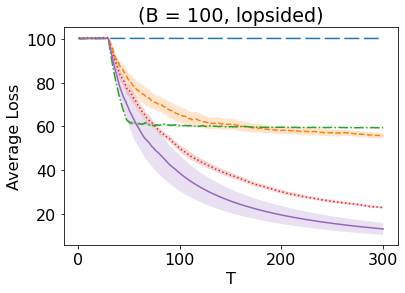

In [81]:
B = 100
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/hartmann_imbalanced_loss_B_%d_T_%d_non_active.npy"%(B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"hartmann_imbalanced_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/hartmann_imbalanced_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
C_list_1 = [10]
for C in C_list_1:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/new/hartmann_imbalanced_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
C_list_2 = [0.5]
for C in C_list_2:
    our_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/hartmann_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Loss")
plt.title("(B = %d, lopsided)"%B)
# plt.ylim(0,2)
plt.savefig("./figures/new_v3/Hartmann_imbalanced_loss_B_%d.pdf"%B, bbox_inches='tight')

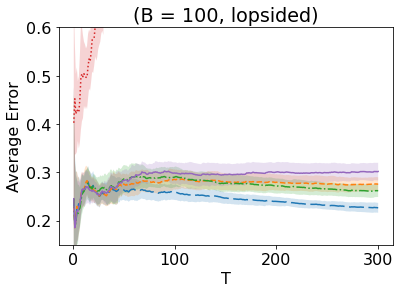

In [83]:
# non active
non_loss = np.load("./non_active/hartmann_imbalanced_error_B_%d_T_%d_non_active.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"hartmann_imbalanced_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, "--", label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/hartmann_imbalanced_error_B_%d_T_%d_drift.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, "-.", label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1:
    discrete_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/discrete/new/hartmann_imbalanced_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# C_list_2 = [1, 1.5, 2]
for C in C_list_2:
    our_loss = np.load("/Users/caiting/Downloads/SE_kernel_2/hartmann_imbalanced_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(fontsize = 16)
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, lopsided)"%B)
plt.ylim(0.15, 0.6)
plt.savefig("./figures/new_v3/Hartmann_imbalanced_error_B_%d.pdf"%B, bbox_inches='tight')

# Supernova

In [2]:
path = "/Users/caiting/Downloads/SE_kernel_2/"
B_list = [1, 10, 100]
T = 192

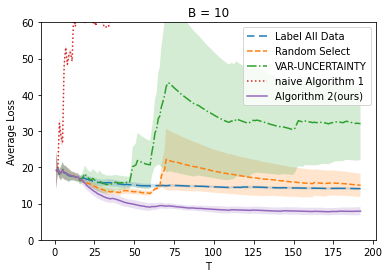

In [7]:
B = 10
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/supernova_uniform_loss_B_%d_T_%d_non_active.npy"%(B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Label All Data")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"real_datasets/supernova_uniform_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, "--", label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/new/supernova_uniform_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, "-.", label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
C_list_1 = [10]
for C in C_list_1:
    discrete_loss = np.load(path + "discrete/new/supernova_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
C_list_2 = [1]
for C in C_list_2:
    our_loss = np.load(path + "real_datasets/supernova_uniform_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend(loc = "upper right", fontsize = 10)
plt.xlabel("T")
plt.ylabel("Average Loss")
plt.title("B = %d"%B)
plt.ylim(0, 60)

plt.savefig("./figures/supernova_loss_B_%d.pdf"%B, bbox_inches='tight')

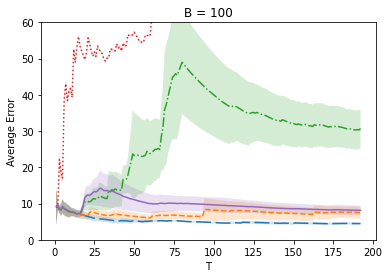

In [36]:
# non active
non_loss = np.load("./non_active/supernova_uniform_error_B_%d_T_%d_non_active.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"real_datasets/supernova_uniform_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, "--", label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/new/supernova_uniform_error_B_%d_T_%d_drfit.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, "-.", label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# # C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1:
    discrete_loss = np.load(path + "discrete/new/supernova_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# C_list_2 = [1, 1.5, 2]
for C in C_list_2:
    our_loss = np.load(path + "real_datasets/supernova_uniform_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best", fontsize = 12)
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("B = %d"%B)
plt.ylim(0, 60)
plt.savefig("./figures/new_v3/supernova_error_B_%d.pdf"%B, bbox_inches='tight')

# Parkinsons
### Uniform

In [2]:
path = "/Users/caiting/Downloads/SE_kernel_2/"
B_list = [10, 100]
T = 210

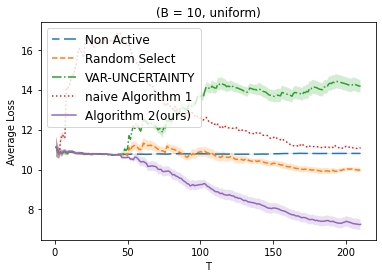

In [7]:
B = 10
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/parkinsons_uniform_loss_B_%d_T_%d_non_active.npy"%(B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"real_datasets/parkinsons_uniform_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, "--", label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/new/parkinsons_uniform_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, "-.", label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
C_list_1 = [5]
for C in C_list_1:
    discrete_loss = np.load(path + "discrete/new/parkinsons_uniform_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
C_list_2 = [5]
for C in C_list_2:
    our_loss = np.load(path + "real_datasets/parkinsons_uniform_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend(loc = "upper left", fontsize = 12)
plt.xlabel("T")
plt.ylabel("Average Loss")
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/parkinsons_uniform_loss_B_%d.pdf"%B, bbox_inches='tight')

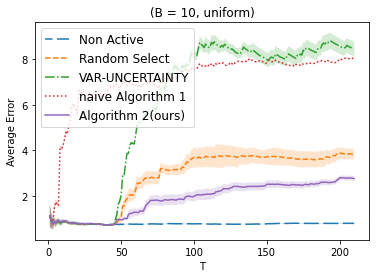

In [11]:
# non active
non_loss = np.load("./non_active/parkinsons_uniform_error_B_%d_T_%d_non_active.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"real_datasets/parkinsons_uniform_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, "--", label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/new/parkinsons_uniform_error_B_%d_T_%d_drift.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, "-.", label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# # C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1:
    discrete_loss = np.load(path + "discrete/new/parkinsons_uniform_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# C_list_2 = [1, 1.5, 2]
for C in C_list_2[0:1]:
    our_loss = np.load(path + "real_datasets/parkinsons_uniform_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend(loc = "upper left", fontsize = 12)
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/parkinsons_uniform_error_B_%d.pdf"%B, bbox_inches='tight')

In [409]:
B = 100
T = 192
C = 1
our = np.load(path+ "real_datasets/supernova_uniform_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
drift = np.load(path+"real_datasets/new/supernova_uniform_loss_B_%d_T_%d_drift.npy"%(B, T))
(np.array(drift).mean(0).sum() - np.array(our).mean(0).sum()) /np.array(drift).mean(0).sum()

0.5328465735229434

In [410]:
np.array([0.5295979029281582, 0.6580882823517321,0.5328465735229434 ]).mean()

0.5735109196009446

### Imbalanced

In [12]:
path = "/Users/caiting/Downloads/SE_kernel_2/"
B_list = [10, 100]
T = 194

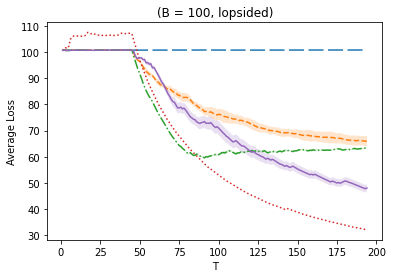

In [17]:
B = 100
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/parkinsons_imbalanced_loss_B_%d_T_%d_non_active.npy"%(B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, "--", label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/new/parkinsons_imbalanced_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, "-.", label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
C_list_1 = [5]
for C in C_list_1:
    discrete_loss = np.load(path + "discrete/new/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
C_list_2 = [5]
for C in C_list_2:
    our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(fontsize = 12)
plt.xlabel("T")
plt.ylabel("Average Loss")
plt.title("(B = %d, lopsided)"%B)
# plt.ylim(0, 15)
plt.savefig("./figures/new_v3/parkinsons_imbalanced_loss_B_%d.pdf"%B, bbox_inches='tight')

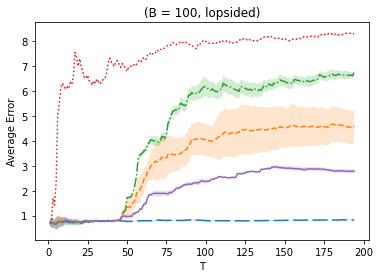

In [18]:
# non active
non_loss = np.load("./non_active/parkinsons_imbalanced_error_B_%d_T_%d_non_active.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"real_datasets/parkinsons_imbalanced_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, "--", label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/new/parkinsons_imbalanced_error_B_%d_T_%d_drift.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, "-.", label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# # C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1:
    discrete_loss = np.load(path + "discrete/new/parkinsons_imbalanced_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, ":", label = "naive Algorithm 1")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# C_list_2 = [1, 1.5, 2]
for C in C_list_2[0:1]:
    our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, "-", label = "Algorithm 2(ours)")
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend()
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, lopsided)"%B)
plt.savefig("./figures/new_v3/parkinsons_imbalanced_error_B_%d.pdf"%B, bbox_inches='tight')

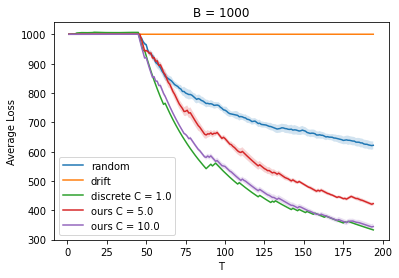

In [176]:
B = 1
x = range(1, T+1)

# random
random_loss = np.load(path+"real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_random.npy"%(B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_drift.npy"%(B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
C_list_1 = [0.1, 0.5, 1, 5, 10]
for C in C_list_1[2:3]:
    discrete_loss = np.load(path + "discrete/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100))
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, label = "discrete C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
C_list_2 = [5, 10, 15, 20]
for C in C_list_2[0:2]:
    our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, label = "ours C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Loss")
plt.title("B = %d"%B)
plt.savefig("./figures/gp/parkinsons_imbalanced_loss_B_%d.pdf"%B)

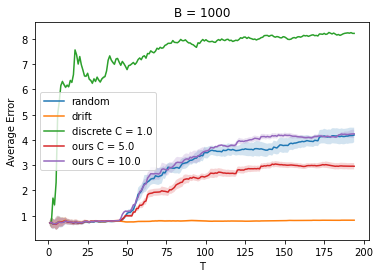

In [177]:
random_loss = np.load(path+"real_datasets/parkinsons_imbalanced_error_B_%d_T_%d_random.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"real_datasets/parkinsons_imbalanced_error_B_%d_T_%d_drift.npy"%(B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# # C_list_1 = [0.1, 1, 10, 50, 100]
for C in C_list_1[2:3]:
    discrete_loss = np.load(path + "discrete/parkinsons_imbalanced_error_B_%d_T_%d_C_%d_discrete.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(discrete_loss).mean(0)
    y_err = np.array(discrete_loss).std(0)
    plt.plot(x, y, label = "discrete C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# C_list_2 = [1, 1.5, 2]
for C in C_list_2[0:2]:
    our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_error_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100)).cumsum(1) / np.arange(1, T+1)
    y = np.array(our_loss).mean(0)
    y_err = np.array(our_loss).std(0)
    plt.plot(x, y, label = "ours C = %.1f"%C)
    plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend()
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("B = %d"%B)
plt.savefig("./figures/gp/parkinsons_imbalanced_error_B_%d.pdf"%B)

# 10 arm 
### uniform

In [2]:
path = "./K_discrete/"
B_list = [10, 100]
T = 10000
K = 10

In [3]:
plt.rcParams.update({'font.size': 22})

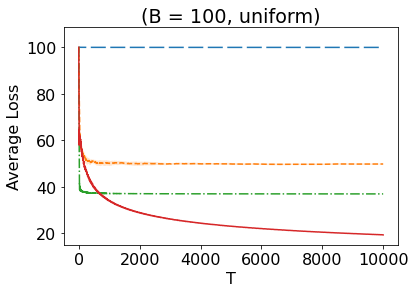

In [25]:
B = 100
x = range(1, T+1)
plt.rcParams.update({'font.size': 16})

# non active
non_loss = np.load("./non_active/arm_%d_loss_B_%d_T_%d_uniform.npy"%(K, B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"arm_%d_loss_B_%d_T_%d_random.npy"%(K, B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"new/arm_%d_uniform_loss_B_%d_T_%d_drift.npy"%(K, B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
C = 0.25
our_loss = np.load(path+"arm_%d_loss_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100))
y = np.array(our_loss).mean(0)
y_err = np.array(our_loss).std(0)
plt.plot(x, y, '-', label = "Algorithm 1(ours)")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
# C_list_1 = [0.25]
# C_list_1 = [0.1, 0.25, 0.5, 0.75, 1]
# for C in C_list_1:
#     discrete_loss = np.load(path + "arm_%d_loss_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100))
#     y = np.array(discrete_loss).mean(0)
#     y_err = np.array(discrete_loss).std(0)
# #     plt.plot(x, y, label = "Algorithm 1(ours) C = %.1f"%C)
#     plt.plot(x, y, '-', label = "$\lambda = $%.2f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
# C_list_2 = [5, 10, 15, 20]
# for C in C_list_2[0:2]:
#     our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
#     y = np.array(our_loss).mean(0)
#     y_err = np.array(our_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.1f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best", fontsize = 10)
plt.xlabel("T")
plt.ylabel("Average Loss")
# plt.ylim(top = 75)
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/arm_%d_uniform_loss_B_%d.pdf"%(K,B), bbox_inches='tight')
# plt.savefig("./figures/new_v2/abalation_arm_%d_uniform_loss_B_%d.pdf"%(K,B), bbox_inches='tight')

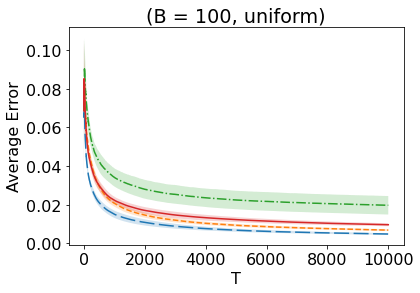

In [26]:
# non active
non_loss = np.load("./non_active/arm_%d_error_B_%d_T_%d_uniform.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"arm_%d_error_B_%d_T_%d_random.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"new/arm_%d_uniform_error_B_%d_T_%d_drift.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
discrete_loss = np.load(path + "arm_%d_error_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100)).cumsum(1) / np.arange(1, T+1)
y = np.array(discrete_loss).mean(0)
y_err = np.array(discrete_loss).std(0)
#     plt.plot(x, y, label = " C = %.1f"%C)
plt.plot(x, y, '-', label = "Algorithm 1(ours)")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
# C_list_2 = [5, 10, 15, 20]
# for C in C_list_2[0:2]:
#     our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
#     y = np.array(our_loss).mean(0)
#     y_err = np.array(our_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.1f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/arm_%d_uniform_error_B_%d.pdf"%(K,B), bbox_inches='tight')

### imbalanced

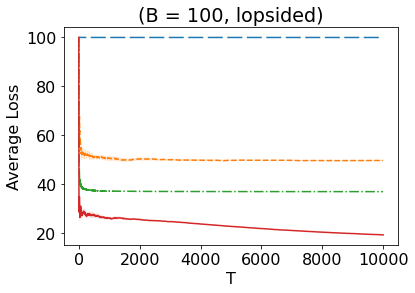

In [38]:
B = 100
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/arm_%d_loss_B_%d_T_%d_imbalanced.npy"%(K, B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"arm_%d_imbalanced_loss_B_%d_T_%d_random.npy"%(K, B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/arm_%d_imbalanced_loss_B_%d_T_%d_drift.npy"%(K, B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
C = 0.25
discrete_loss = np.load(path + "arm_%d_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100))
y = np.array(discrete_loss).mean(0)
y_err = np.array(discrete_loss).std(0)
plt.plot(x, y, '-', label = "Algorithm 1(ours)")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)


# plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Loss")
# plt.ylim(top = 75)
plt.title("(B = %d, lopsided)"%B)
plt.savefig("./figures/new_v3/arm_%d_imbalanced_loss_B_%d.pdf"%(K,B), bbox_inches='tight')

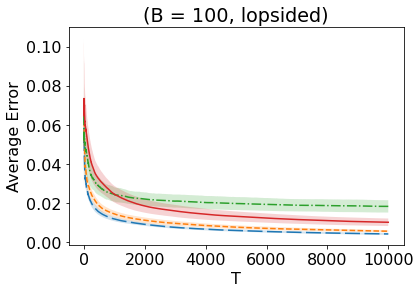

In [39]:
# non active
non_loss = np.load("./non_active/arm_%d_error_B_%d_T_%d_imbalanced.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)


# random
random_loss = np.load(path+"arm_%d_imbalanced_error_B_%d_T_%d_random.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/arm_%d_imbalanced_error_B_%d_T_%d_drift.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
# for C in C_list_1:
discrete_loss = np.load(path + "arm_%d_imbalanced_error_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100)).cumsum(1) / np.arange(1, T+1)
y = np.array(discrete_loss).mean(0)
y_err = np.array(discrete_loss).std(0)
plt.plot(x, y, '-', label = "Algorithm 1(ours)")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
# C_list_2 = [5, 10, 15, 20]
# for C in C_list_2[0:2]:
#     our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
#     y = np.array(our_loss).mean(0)
#     y_err = np.array(our_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.1f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, lopsided)"%B)
plt.savefig("./figures/new_v3/arm_%d_imbalanced_error_B_%d.pdf"%(K,B), bbox_inches='tight')

# 100 arms
### uniform

In [40]:
path = "./K_discrete/"
B_list = [10, 100]
T = 10000
K = 100

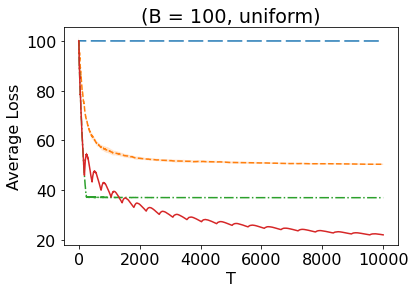

In [49]:
B = 100
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/arm_%d_uniform_loss_B_%d_T_%d.npy"%(K, B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)


# random
random_loss = np.load(path+"arm_%d_uniform_loss_B_%d_T_%d_random.npy"%(K, B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/arm_%d_uniform_loss_B_%d_T_%d_drift.npy"%(K, B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
C = 0.75
discrete_loss = np.load(path + "arm_%d_uniform_loss_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100))
y = np.array(discrete_loss).mean(0)
y_err = np.array(discrete_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.2f"%C)
plt.plot(x, y, '-', label = "Algorithm 1(ours)")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
# C_list_2 = [5, 10, 15, 20]
# for C in C_list_2[0:2]:
#     our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
#     y = np.array(our_loss).mean(0)
#     y_err = np.array(our_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.1f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Loss")
# plt.ylim(top = 75)
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/arm_%d_uniform_loss_B_%d.pdf"%(K,B), bbox_inches='tight')

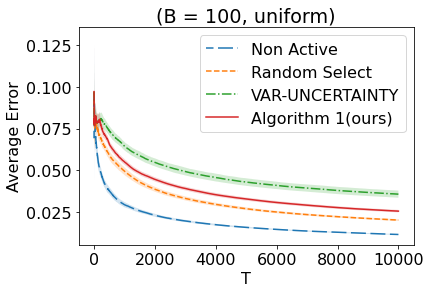

In [50]:
# non active
non_loss = np.load("./non_active/arm_%d_uniform_error_B_%d_T_%d.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)


# random
random_loss = np.load(path+"arm_%d_uniform_error_B_%d_T_%d_random.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "Random Select")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/arm_%d_uniform_error_B_%d_T_%d_drift.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "VAR-UNCERTAINTY")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]

discrete_loss = np.load(path + "arm_%d_uniform_error_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100)).cumsum(1) / np.arange(1, T+1)
y = np.array(discrete_loss).mean(0)
y_err = np.array(discrete_loss).std(0)
#     plt.plot(x, y, '-', label = "ours C = %.2f"%C)
plt.plot(x, y, '-', label = "Algorithm 1(ours)")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
# C_list_2 = [5, 10, 15, 20]
# for C in C_list_2[0:2]:
#     our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
#     y = np.array(our_loss).mean(0)
#     y_err = np.array(our_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.1f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, uniform)"%B)
plt.savefig("./figures/new_v3/arm_%d_uniform_error_B_%d.pdf"%(K,B), bbox_inches='tight')

In [278]:
K

100

### imbalanced

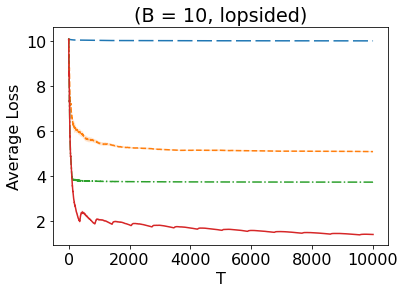

In [58]:
B = 10
x = range(1, T+1)

# non active
non_loss = np.load("./non_active/arm_%d_imbalanced_loss_B_%d_T_%d.npy"%(K, B, T))
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"arm_%d_imbalanced_loss_B_%d_T_%d_random.npy"%(K, B, T))
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/arm_%d_imbalanced_loss_B_%d_T_%d_drift.npy"%(K, B, T))
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
C = 2
discrete_loss = np.load(path + "arm_%d_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100))
y = np.array(discrete_loss).mean(0)
y_err = np.array(discrete_loss).std(0)
plt.plot(x, y, '-', label = "Algorithm 1 (ours)")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
# C_list_2 = [5, 10, 15, 20]
# for C in C_list_2[0:2]:
#     our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
#     y = np.array(our_loss).mean(0)
#     y_err = np.array(our_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.1f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Loss")
# plt.ylim(top = 75)
plt.title("(B = %d, lopsided)"%B)
plt.savefig("./figures/new_v3/arm_%d_imbalanced_loss_B_%d.pdf"%(K,B), bbox_inches='tight')

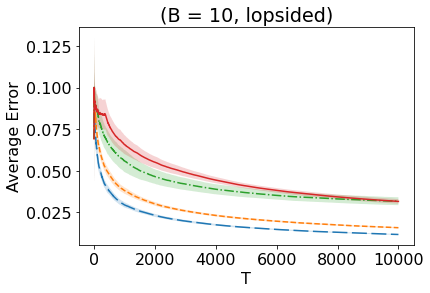

In [59]:
# non active
non_loss = np.load("./non_active/arm_%d_imbalanced_error_B_%d_T_%d.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(non_loss).mean(0)
y_err = np.array(non_loss).std(0)
plt.plot(x, y, linestyle = (5, (10, 3)), label = "Non Active")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# random
random_loss = np.load(path+"arm_%d_imbalanced_error_B_%d_T_%d_random.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(random_loss).mean(0)
y_err = np.array(random_loss).std(0)
plt.plot(x, y, '--', label = "random")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# drift
drift_loss = np.load(path+"/new/arm_%d_imbalanced_error_B_%d_T_%d_drift.npy"%(K, B, T)).cumsum(1) / np.arange(1, T+1)
y = np.array(drift_loss).mean(0)
y_err = np.array(drift_loss).std(0)
plt.plot(x, y, '-.', label = "drift")
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# discrete
# C_list_1 = [1, 10, 20, 30, 40, 50]
# for C in C_list_1:
discrete_loss = np.load(path + "arm_%d_imbalanced_error_B_%d_T_%d_C_%d_ours.npy"%(K, B, T, C*100)).cumsum(1) / np.arange(1, T+1)
y = np.array(discrete_loss).mean(0)
y_err = np.array(discrete_loss).std(0)
plt.plot(x, y, '-', label = "ours C = %.2f"%C)
plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# ours
# B = 1: [1, 1.5, 2]
# B = 10, 100, 1000: [0.5, 1, 1.5, 2]
# C_list_2 = [0.1, 0.25, 0.5, 1, 1.5]
# C_list_2 = [5, 10, 15, 20]
# for C in C_list_2[0:2]:
#     our_loss = np.load(path + "real_datasets/parkinsons_imbalanced_loss_B_%d_T_%d_C_%d_ours.npy"%(B, T, C*100))
#     y = np.array(our_loss).mean(0)
#     y_err = np.array(our_loss).std(0)
#     plt.plot(x, y, label = "ours C = %.1f"%C)
#     plt.fill_between(x, y-1.96*y_err/np.sqrt(10), y+1.96*y_err/np.sqrt(10), alpha = 0.2)

# plt.legend(loc = "best")
plt.xlabel("T")
plt.ylabel("Average Error")
plt.title("(B = %d, lopsided)"%B)
plt.savefig("./figures/new_v3/arm_%d_imbalanced_error_B_%d.pdf"%(K,B), bbox_inches='tight')